# Car Price Prediction with Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import numpy as np

In [5]:
df = pd.read_csv('C:/AI lab/car_data.csv')

In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
from datetime import datetime

In [17]:
# Feature: Age of Car
df['Car_Age'] = datetime.now().year - df['Year']

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Feature: Brand
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])


In [24]:
# Optional: Brand goodwill scores (you can update scores as needed)
brand_score = {'Maruti': 0.7, 'Hyundai': 0.8, 'Honda': 0.9, 'Toyota': 1.0, 'BMW': 1.2}
df['Brand_Score'] = df['Brand'].map(brand_score).fillna(0.6)


In [26]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Selling_type'], drop_first=True)


In [28]:
# Drop columns you don’t need
df_final = df_encoded.drop(['Car_Name', 'Year', 'Brand'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Selling_Price', axis=1)
y = df_final['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 3.46


In [34]:
features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Brand_Score',
            'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual',
            'Selling_type_Individual']  # include these only if one-hot encoded

target = 'Selling_Price'

X = df_final[features]
y = df_final[target]

In [36]:
from sklearn.model_selection import train_test_split

X = df_final[features]  # Use the updated list based on df_final.columns
y = df_final['Selling_Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.46
R² Score: 0.85


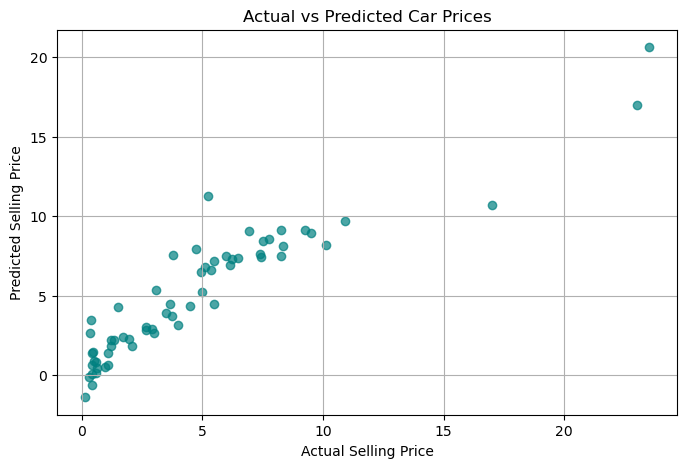

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

In [41]:
y_pred = model.predict(X_test)

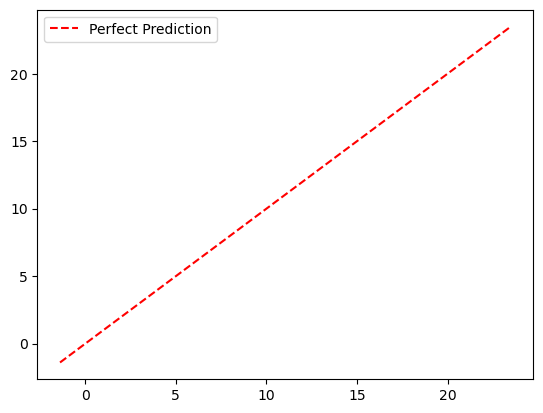

In [44]:
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()

In [45]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

     Actual  Predicted
177    0.35   2.648128
289   10.11   8.174387
228    4.95   6.454455
198    0.15  -1.395833
60     6.95   9.082761


In [48]:
results.to_csv('C:/AI lab/predicted_prices.csv', index=False)

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.9025296922950815
R² Score: 0.9608201957497491


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} R²: {r2_score(y_test, pred):.2f}")

Random Forest R²: 0.96
Gradient Boosting R²: 0.96
Linear Regression R²: 0.85


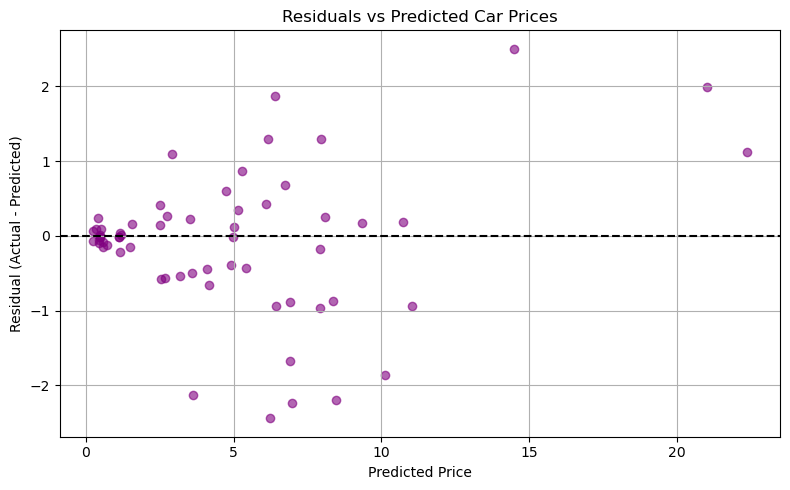

In [56]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define columns
numeric_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Brand_Score']
categorical_features = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Selling_type_Individual']  # Already encoded

# Optional: if you still have original categorical columns, use this instead:
# categorical_features = ['Fuel_Type', 'Transmission', 'Selling_type']

# Prepare feature matrix
X = df_final[numeric_features + categorical_features]
y = df_final['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error
import joblib

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Save model
joblib.dump(pipeline, 'C:/AI lab/car_price_model.pkl')

R² Score: 0.9629983354066672
MSE: 0.8523549721311473


['C:/AI lab/car_price_model.pkl']

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you already have y_test and y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ₹{mae:.2f} lakhs")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f} lakhs")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): ₹0.62 lakhs
Root Mean Squared Error (RMSE): ₹0.92 lakhs
R² Score: 0.963


In [60]:
%%writefile  carprice.py
import streamlit as st
import joblib
import numpy as np

# Load trained model
model = joblib.load('C:/AI lab/car_price_model.pkl')

st.title("Car Price Predictor 🚘")

# Input fields for car features
present_price = st.number_input('Present Price (in lakhs)', min_value=0.0)
driven_kms = st.number_input('Kilometers Driven', min_value=0)
owner = st.selectbox('Number of Previous Owners', [0, 1, 2, 3])
car_age = st.number_input('Car Age (in years)', min_value=0)
brand_score = st.slider('Brand Reputation Score', min_value=0.5, max_value=1.5, value=1.0)

# Encoded categorical features (simplified for demo)
fuel_diesel = st.checkbox('Fuel Type: Diesel')
fuel_petrol = st.checkbox('Fuel Type: Petrol')
trans_manual = st.checkbox('Transmission: Manual')
selling_individual = st.checkbox('Selling Type: Individual')

# Prediction button
if st.button('Predict Price'):
    # Prepare input array
    input_data = np.array([[present_price, driven_kms, owner, car_age, brand_score,
                            int(fuel_diesel), int(fuel_petrol),
                            int(trans_manual), int(selling_individual)]])
    
    price = model.predict(input_data)[0]
    st.success(f"Estimated Selling Price: ₹{price:.2f} lakhs")

Overwriting carprice.py


In [ ]:
!streamlit run carprice.py